In [24]:
import os
import pandas as pd
import numpy as np


diretorio_quero2 = r'INMET/Cuiabadados_83361_D_1910-12-31_2024-06-28.csv'

ler = pd.read_csv(diretorio_quero2, skiprows = 9, sep=';', decimal=',')
display(ler)

from datetime import datetime
# Convertendo a coluna 'Data Medicao' para datetime
ler['Data Medicao'] = pd.to_datetime(ler['Data Medicao'], format="%Y-%m-%d")


ler=pd.DataFrame(ler.rename(columns ={'Data Medicao':'data', 'PRECIPITACAO TOTAL, DIARIO(mm)':'chuva diaria(mm)'}))
ler= ler[['data' ,'chuva diaria(mm)']]
ler['ano']= ler['data'].dt.year
display(ler)


#analisar os dados por completo
def is_leap_year(year):
    #print("Verifica se um ano é bissexto.")
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

def days_in_year(year):
    #print("Retorna o número de dias em um ano específico.")
    return 366 if is_leap_year(year) else 365


null_counts_res = ler.isnull().sum()
print('verificar se tem dias sem dados, neste caso não')
print(null_counts_res)

#base para filtrar os dados, e retirar o ano que não tem todos os dados diários
#deletar a linha toda que tem NaN
#axis = 0 são dados de linha, e o axis= 1 é de coluna
ler_deletado_nan=ler.dropna(axis=0, how='any')
ler_deletado_nan=ler_deletado_nan.reset_index()
display(ler_deletado_nan)

ler_deletado_nan['dias'] = ler_deletado_nan.groupby(['ano'])['ano'].transform('count')

ler_deletado_nan

ler_deletado_nan['Dias_que_deve_Ter']= [days_in_year(ano) for ano in ler_deletado_nan['ano']]


ler_deletado_nan


Max_anual_novo_deletado = pd.DataFrame(ler_deletado_nan.groupby(['ano','Dias_que_deve_Ter']).agg({'chuva diaria(mm)':'max','dias':'max'}))
Max_anual_novo_deletado= Max_anual_novo_deletado.reset_index()
display(Max_anual_novo_deletado)


ano_para_remover=[]
for n, dias in enumerate(Max_anual_novo_deletado['dias']):
    if dias != Max_anual_novo_deletado['Dias_que_deve_Ter'][n]:
            print('ano remover')
            print(Max_anual_novo_deletado['ano'][n])
            ano_para_remover.append(Max_anual_novo_deletado['ano'][n])
            
            
print('saber quais anos devo remover, pois não obedeceu a regra para a análise')
print(ano_para_remover)


              
#--------------------removendo----------------------


for n, ano_u in enumerate(Max_anual_novo_deletado['ano']):
  #  print(n, ano_u)
    for ano_deleta in ano_para_remover:
        #print(ano_deleta, ano_u)
        if ano_u == ano_deleta :
            print(ano_u,ano_deleta)
            indices_to_remove = Max_anual_novo_deletado[Max_anual_novo_deletado['ano'] == Max_anual_novo_deletado['ano'][n]].index
            print(indices_to_remove, ano_u)
            # Usando .loc para remover as linhas
            Max_anual_novo_deletado = Max_anual_novo_deletado.drop(indices_to_remove)
display(Max_anual_novo_deletado)
                

Max_anual_novo_deletado=Max_anual_novo_deletado[['ano', 'chuva diaria(mm)']]
display(Max_anual_novo_deletado)


,Data Medicao,"PRECIPITACAO TOTAL, DIARIO(mm)",Unnamed: 2
0,1961-01-01,NaN,NaN
1,1961-01-02,0.0,NaN
2,1961-01-03,4.1,NaN
3,1961-01-04,14.8,NaN
4,1961-01-05,1.3,NaN
...,...,...,...
23185,2024-06-24,0.0,NaN
23186,2024-06-25,0.0,NaN
23187,2024-06-26,0.0,NaN
23188,2024-06-27,0.0,NaN


,data,chuva diaria(mm),ano
0,1961-01-01,NaN,1961
1,1961-01-02,0.0,1961
2,1961-01-03,4.1,1961
3,1961-01-04,14.8,1961
4,1961-01-05,1.3,1961
...,...,...,...
23185,2024-06-24,0.0,2024
23186,2024-06-25,0.0,2024
23187,2024-06-26,0.0,2024
23188,2024-06-27,0.0,2024


verificar se tem dias sem dados, neste caso não
data                  0
chuva diaria(mm)    806
ano                   0
dtype: int64


,index,data,chuva diaria(mm),ano
0,1,1961-01-02,0.0,1961
1,2,1961-01-03,4.1,1961
2,3,1961-01-04,14.8,1961
3,4,1961-01-05,1.3,1961
4,5,1961-01-06,1.5,1961
...,...,...,...,...
22379,23185,2024-06-24,0.0,2024
22380,23186,2024-06-25,0.0,2024
22381,23187,2024-06-26,0.0,2024
22382,23188,2024-06-27,0.0,2024


,ano,Dias_que_deve_Ter,chuva diaria(mm),dias
0,1961,365,71.3,364
1,1962,365,75.8,365
2,1963,365,102.5,365
3,1964,366,107.0,365
4,1965,365,99.5,365
...,...,...,...,...
59,2020,366,53.2,353
60,2021,365,55.8,361
61,2022,365,115.2,363
62,2023,365,70.2,362


ano remover
1961
ano remover
1964
ano remover
1967
ano remover
1975
ano remover
1978
ano remover
1990
ano remover
1991
ano remover
1992
ano remover
1993
ano remover
1994
ano remover
1995
ano remover
1996
ano remover
1997
ano remover
1998
ano remover
1999
ano remover
2000
ano remover
2001
ano remover
2002
ano remover
2003
ano remover
2005
ano remover
2006
ano remover
2008
ano remover
2009
ano remover
2010
ano remover
2013
ano remover
2014
ano remover
2015
ano remover
2016
ano remover
2017
ano remover
2018
ano remover
2019
ano remover
2020
ano remover
2021
ano remover
2022
ano remover
2023
ano remover
2024
saber quais anos devo remover, pois não obedeceu a regra para a análise
[1961, 1964, 1967, 1975, 1978, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2005, 2006, 2008, 2009, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
1961 1961
Index([0], dtype='int64') 1961
1964 1964
Index([3], dtype='int64') 1964
1967 1967
Index([

,ano,Dias_que_deve_Ter,chuva diaria(mm),dias
1,1962,365,75.8,365
2,1963,365,102.5,365
4,1965,365,99.5,365
5,1966,365,124.6,365
7,1968,366,99.7,366
8,1969,365,76.5,365
9,1970,365,115.1,365
10,1971,365,68.8,365
11,1972,366,112.7,366
12,1973,365,62.5,365


,ano,chuva diaria(mm)
1,1962,75.8
2,1963,102.5
4,1965,99.5
5,1966,124.6
7,1968,99.7
8,1969,76.5
9,1970,115.1
10,1971,68.8
11,1972,112.7
12,1973,62.5


# Calculando a PMP

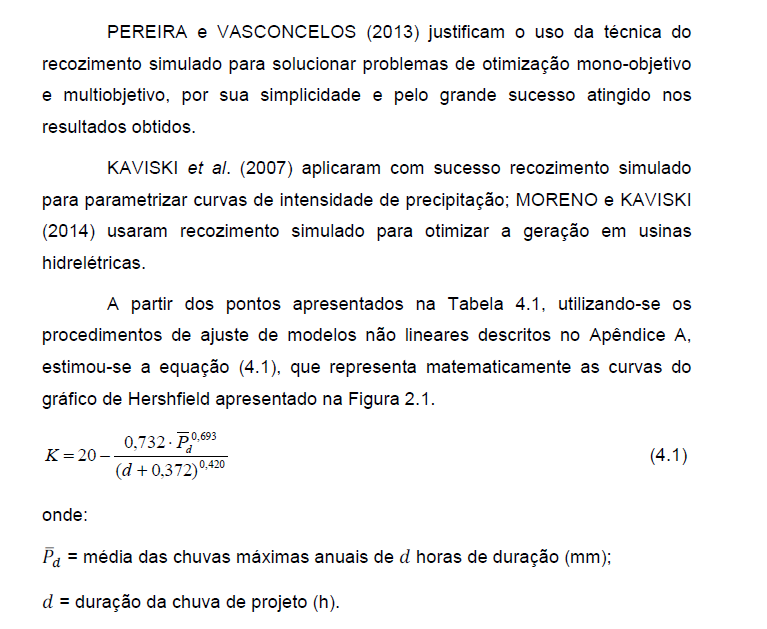


Fonte: Letícia Carlini Burger (ADAPTAÇÃO E ANÁLISE DO MÉTODO DE HERSHFIELD PARA
ESTIMATIVA DA PRECIPITAÇÃO MÁXIMA PROVÁVEL (PMP))

In [25]:
Tabela_pmp_2=[]
media= Max_anual_novo_deletado['chuva diaria(mm)'].mean()
desviopadrao= Max_anual_novo_deletado['chuva diaria(mm)'].std()
dadosm_d=[media, desviopadrao]
print(dadosm_d)

Xn= media
Sn=desviopadrao
d = 24
Km = 20 - (0.732 * Xn ** 0.693) / ((d + 0.372) ** 0.420)

PMP = Xn + Km * Sn
print(PMP)

   # stn = nf.split('\\')[1].replace('.csv','').replace('chuvas_dia_','')
    #print(stn)
registro= [f'Cuiabá-MT',Xn ,Sn, Km, PMP]
print(registro)
Tabela_pmp_2.append(registro)

[90.68928571428573, 23.12813485115308]
452.6182236196669
['Cuiabá-MT', 90.68928571428573, 23.12813485115308, 15.648859721489245, 452.6182236196669]


In [26]:
Tabela_pmp_2df= pd.DataFrame(Tabela_pmp_2, columns=['estacao','Media_chuva(Xn)', 'DesvioPadrao(Sn)','Km', 'PMP'])




In [27]:
display(Tabela_pmp_2df)

,estacao,Media_chuva(Xn),DesvioPadrao(Sn),Km,PMP
0,Cuiabá-MT,90.689286,23.128135,15.64886,452.618224


In [28]:
#Tabela_pmp_2df.to_excel('Hershfiel_24horas.xlsx', index=False)

In [29]:


df_ordenado = Max_anual_novo_deletado.sort_values(by='chuva diaria(mm)', ascending=False)
df_ordenado=df_ordenado.reset_index()
    
try:
    plota=df_ordenado.head(2)
    display(plota)
    maximo_chuva_diaria_anual= df_ordenado['chuva diaria(mm)'][0]  
    Maximo_ano__chuva_diaria_anual= df_ordenado['ano'][0] 
except :
    pass

,index,ano,chuva diaria(mm)
0,46,2007,142.3
1,5,1966,124.6


In [30]:
ler.loc[(ler['ano']==Maximo_ano__chuva_diaria_anual) & (ler['chuva diaria(mm)']==maximo_chuva_diaria_anual)]

,data,chuva diaria(mm),ano
16822,2007-01-22,142.3,2007


In [31]:
data_maximo =ler.loc[(ler['ano']==Maximo_ano__chuva_diaria_anual) & (ler['chuva diaria(mm)']==maximo_chuva_diaria_anual)]
data_maximo= data_maximo.reset_index()

In [32]:
Tabela_pmp_2

[['Cuiabá-MT',
  90.68928571428573,
  23.12813485115308,
  15.648859721489245,
  452.6182236196669]]

In [33]:
data_maximo['data'][0]

Timestamp('2007-01-22 00:00:00')

In [34]:
data_maximo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             1 non-null      int64         
 1   data              1 non-null      datetime64[ns]
 2   chuva diaria(mm)  1 non-null      float64       
 3   ano               1 non-null      int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1)
memory usage: 160.0 bytes


In [35]:
data_maximo['date']= data_maximo['data'].dt.date


In [36]:
#data_maximo0= pd.Timestamp(data_maximo['data'].iloc[0])
data_maximo0= (data_maximo['data'][0])

In [37]:
print(type(data_maximo))



<class 'pandas.core.frame.DataFrame'>


In [38]:
data_maximo

,index,data,chuva diaria(mm),ano,date
0,16822,2007-01-22,142.3,2007,2007-01-22


In [39]:
data_maximo1 = data_maximo['data'][0]
ano = data_maximo['ano'][0]
data_maximo0 = data_maximo['date'][0]

In [40]:
print(data_maximo1, data_maximo0,ano )

2007-01-22 00:00:00 2007-01-22 2007


In [41]:

#Tabela_pmp_2.append([data_maximo0,ano])

In [42]:
#Tabela_pmp_2

In [43]:
Tabela_pmp_2df['Data']= data_maximo0
Tabela_pmp_2df['ano'] = ano 
Tabela_pmp_2df['ChuvaMaxima(mm)']= data_maximo['chuva diaria(mm)']

In [44]:
Tabela_pmp_2df

,estacao,Media_chuva(Xn),DesvioPadrao(Sn),Km,PMP,Data,ano,ChuvaMaxima(mm)
0,Cuiabá-MT,90.689286,23.128135,15.64886,452.618224,2007-01-22,2007,142.3


In [45]:
Tabela_pmp_2df.to_excel('Hershfiel_24horas.xlsx', index=False)